# Ridge Regularisation
Regularization in machine learning is a technique used to prevent overfitting, where a model learns the training data too well, including its noise and outliers, and performs poorly on new, unseen data. It helps models generalize better by adding a penalty to the loss function, which encourages simpler models with smaller coefficients.






You have already been introduced to the concept of regularisation. Let's recall a bit.
$$
\text{New optimization function} = \text{Error} + \underbrace{\lambda*\text{Model complexity}}_{\text{Regularization/Penalty}}
 $$

It is a technique that penalizes the polynomial model that uses a higher degree of *n* and prevents the risk of overfitting. There are three methods to perform the regularisation task. They are as follows:
1. Ridge Regression
2. Lasso Regression
3. Elastic Net Regression

We will go through each of them one by one. But first, lets understand the need of regularisation.

Sometimes your dataset consists of noise (outliers, irrelevant data points) and your model tries to capture it, making the model overfit. The more your model is overfit, the more difficult it is to generalize over unseen data. So, it is important to fit a model that minimizes your loss function, neither too close to zero (the case of overfitting) nor too far from zero (the case of underfitting). Thats where regularisation comes in action.

We know OLS method finds the unbiased parameter estimates that best fits the data. It means that OLS treats every independent variables equally i.e it doesn't consider which independent variable is more important than other variables and it just finds the best fit parameters of these variables. So, there is always one set of ${\boldsymbol\beta}$ estimates which results in lowest Residual Sum of Squares (RSS). But the question arises, will those estimates always result in the best model? The answer is No, because there may be a possibility of the model overfitting the data or generalizing poorly to unseen data. To solve this problem, we apply Ridge Regression.








## Mathematical Formulation of Ridge Regression

As we recalled from OLS, the objective of OLS is to find a column matrix or a column vector, $\boldsymbol{\beta}$, such that _Sum of Squared Errors_, $\text{SSE}$ is minimum. Likewise, the objective of Ridge Regression is to find a column matrix or column vector, $\boldsymbol{\beta}$, that minimized the sum of _Residual Sum of Squares_ ($\text{RSS}$) and penalty equivalent to sum of squared coefficients, which is written as:

$$\text{Cost}_{Ridge}=\text{RSS} + \lambda \sum_{j=1}^{d} \boldsymbol{\beta_j^2}= \sum_{i=1}^{n} (y_i-\hat{y_i})^2 + \lambda \sum_{j=1}^{d} \boldsymbol{\beta_j^2}= \sum_{i=1}^{n}\epsilon_i^2 + \lambda \sum_{j=1}^{d}\boldsymbol{\beta_j^2}$$

where ${\lambda}$(lambda) is a tuning parameter that along with the summation of the square of coefficient, ${\boldsymbol\beta}$, form the second term of the equation called shrinkage penalty. Remember that we will not be including bias or $\beta_0$ in penalty term because the model might assign high value to bias in order to compensate the cost. When the parameters ${\boldsymbol\beta_1},...,{\boldsymbol\beta_d}$ are close to zero, the shrinkage penalty is small. The tuning parameter ${\lambda}$ controls the contribution of RSS and summation of square of coefficent on the parameter estimates. It can be any value from 0 to $\infty$.  

When ${\lambda}$ = 0, the penalty term has is removed from the equation (i.e., the model is not penalized at all)  and the ridge regression acts like OLS by generating the least square estimates.

When ${\lambda \rightarrow \infty}$, the shrinkage penalty grows and the parameter estimates will approach zero. The model is highly penalized. It results in a simple model which poses the risk of underfitting your data i.e., the model won't learn the data enough to make good prediction.

So, finding the optimal value of ${\lambda}$ is the goal which is discussed at the end. The ideal value of lambda produces a model that generalizes well to the unseen data.




Since the parameters are estimates, we usually put _hats_ on them so, the normal equation or the closed form equation to determine estimated parameters is:
$$\boldsymbol{\beta_{Ridge}}=\hat{\boldsymbol{\beta}} =(\mathbf{X}^T\mathbf{X}+\lambda I)^{-1} \mathbf{X}^T\mathbf{y} ......(2)$$

We can recall, OLS method assumed that ${\mathbf{X}^T\mathbf{X}}$ always exists i.e it is invertible matrix . Here, in equation (1), we can see that a small constant value ${\lambda}$ is added to the diagonal entities of matrix ${\mathbf{X}^T\mathbf{X}}$ before taking its inverse to form equation (2). This $\lambda$I term is also called ridge. We are adding ridge to the diagonal and basically producing an invertible matrix, ${\mathbf{X}^T\mathbf{X}+\lambda I}$ even if the ${\mathbf{X}^T\mathbf{X}}$ is singular. This is also one of the reasons Ridge Regression is preferred over OLS. Due to the addition of ridge in the diagonal term, ridge regression is called 'ridge'.


## Implementation on Read World Dataset

For implementation of closed form Ridge Regression Equation we will use the [Boston House Prices Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html).

It is one of the datasets provided by sklearn. It has 506 instances with 13 numericals/categorical features of the Boston city. The *medv* variable is the target variable. It is the median value of owner-occupied homes per $1000.

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from IPython.display import display, HTML

In [ ]:
# Importing the dataset.
from sklearn.datasets import load_boston

#Load the dataset
boston_df=load_boston()

#Create dataframe of dataset
boston=pd.DataFrame(boston_df.data, columns= boston_df.feature_names)
boston['MEDV']=boston_df.target

#Print the first five samples
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


From the correlation matrix of the dataset, the features that are more significant in calculating the target variable can be found to be *RM*, *PTRATIO* and *LSTAT*.


## Implementation of Ridge Regression Closed Form Equation

From above mathematical formulation, we derived the closed form equation of Ridge Regression. Here, we will scale the dataset because the model might focus more on feature containing higher values. Then, we will implement the equation to obtain $\beta$ values.

In [ ]:
# We train the model with features other than MEDV as it is the target variable
X=boston.drop(columns=['MEDV'])
y=boston['MEDV'].values.reshape(-1,1)

In [ ]:
# Feature Scaling should be done before regularization, Otherwise some features will be given more weight than other
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X=scaler.fit_transform(X)

# Bias/Intercept term to 1 for each samples
X=np.c_[np.ones((len(X),1)),X]

# Implementing closed form equation of Ridge Regression with lambda=0.01
lm=0.01
betas = np.linalg.inv(X.T.dot(X)+lm*np.identity(len(X.T.dot(X)))).dot(X.T).dot(y)

In [ ]:
# Formatting to display 2 decimal places only
pd.options.display.float_format = "{:,.2f}".format


In [ ]:
# The beta values corresponding to the column
index=['BIAS','CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']
pd.DataFrame(betas,columns=['Beta value'],index=index).T

,BIAS,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
Beta value,26.54,-9.57,4.63,0.56,2.69,-8.60,19.91,0.07,-16.16,7.02,-6.45,-8.94,3.71,-19.00


## Geometrical Intrepretation of Ridge Regression

We learnt that Ridge Regression places some constraint on the parameters, ${\boldsymbol{\beta}'s}$. Thus formed ${\boldsymbol{\beta_{Ridge}}}$ minimizes the penalized residual sum of squares. With '$n$' number of samples and 'd' number of features. The ridge regression loss function is as follows.

$${\sum_{i=1}^{n} (y_i-\hat{y_i})^2 + \lambda \sum_{j=1}^{d} \boldsymbol{\beta_j^2}} = \sum_{i=1}^{n}(y_i-\sum_{j=0}^{d}x_{ij}\boldsymbol{\beta_j})^2+\lambda \sum_{j=1}^{d}\boldsymbol{\beta_j^2}$$

We are constraining the parameters such that the optimization function gets penalized if $\boldsymbol{\beta}$'s take large value. This is equivalent to minimizing the $\sum_{i=1}^{n}(y_i-\sum_{j=0}^{d}x_{ij}\boldsymbol{\beta_j})^2$ term subject to $\sum_{j=1}^{d}\boldsymbol{\beta_j^2 \leq c}$ for some constant '$c$' where $c>0$. It can also be viewed as a minimization problem with *argmin* or "Argument of Minimum".


$$\underset{\boldsymbol{\beta\in\mathbb{R}}}{\arg\min}\sum[y_i-\hat{y_i}]=\underset{\boldsymbol{\beta\in\mathbb{R}}}{\arg\min}\sum[y_i-(\beta_{i0} + \beta_{1}x_{i1} + \beta_{2}x_{i2} + \cdots +\beta_{d}x_{id})]$$

*argmin* finds the coefficients that minimizes the $\text{RSS}$. The ridge constraint is $L_2$ vector norm and its equation is:

$$||\beta||_2^2=\sqrt{\beta_{0}^2 + \beta_{1}^2 + \beta_{2}^2 + \cdots +\beta_{d}^2}$$

The ridge loss function with $argmin$ and vector norm is as shown below. Notice that the first term of the equation is OLS loss function and second term is ridge penalty.

$$\boldsymbol{\beta_{ridge}} = \underset{\boldsymbol{\beta\in\mathbb{R}}}{\arg\min}||y-X\beta||_2^2+\lambda||\beta||_2^2$$

Ridge Regression is also called L2 Regularization as it uses $L_2$ penalty i.e squared of L2 norm of the parameter estimates. The $L_2$ norm is convex and derivative can be obtained at each point of the curve. The concept of $L_2$ norm is used in its geometrical visualization in forming the $L_2$ norm circle as shown in the figure below. As discussed above, the objective function of ridge regression is $(\mathbf{y} - \mathbf{X}\boldsymbol{\beta})^T(\mathbf{y} - \mathbf{X}\boldsymbol{\beta})+ \lambda \boldsymbol{\beta^T}\boldsymbol{\beta}$
and it is a convex optimization problem.


<figure align="center">

<img src="https://i.postimg.cc/zvpCkH9P/Geometrical-Intrepretation-of-Ridge-Regression.png">
<figcaption>Figure 1: Geometrical Intrepretation of Ridge Regression </figcaption>
</figure>


If $d=2$, then the equation $$\boldsymbol{\sum_{j=1}^{d}}\boldsymbol{\beta_j^2 \leq c}$$ equals $\boldsymbol{\beta_1^2+\beta_2^2 \leq c}$, which is the equation of circle as shown in the figure.
Similarly, the term $(\mathbf{y} - \mathbf{X}\boldsymbol{\beta})^T(\mathbf{y} - \mathbf{X}\boldsymbol{\beta})$ is the OLS solution that generates an ellipse. The centre of the ellipse denotes the point in which the least square error(RSS) is minimum. The ellipse contour plot represents the residual sum of squares (RSS) increasing from inner ellipse to the outer ellipse quadratically. Likewise, the regularization curve is a circle which increases quadratically from origin towards the circumference.  

The goal of this optimization problem is to find the point where the cost function is minimum. When $\lambda=0$, the $L_2$ norm circle passes through the OLS estimate point where $\beta_1$ and $\beta_2$ gives the least RSS value. But, the parameter chosen by OLS is prone to overfitting. So, we need to find that combination of $\beta_1$ and $\beta_2$ where the penalized loss function is minimum. For a particular lambda, we try to find the minimum point that L2 intersects with OLS. This minimum point is called ridge estimate point and the $\lambda$ at this point is the optimal value. This point is the intersection of the ellipse and the circle as shown in the figure. But a question arises, Is the value of $\lambda$ at ridge estimate the optimal value of $\lambda$? The answer is maybe yes, maybe no, because the circle changes with different value of $\lambda$ and it may first intersect the ellipse at different point. Likewise, this point of intersection can fall anywhere in the circumference of the circle unlike L1 regularisation, which will be discussed in the next chapter. Here, we visualized an example with two variables so the ridge constraint is a circle. To visualize an example containing three variables, we need a three dimesional structure (i.e. a sphere) and hypersphere for more dimensions.

Ridge Regression is unable to reduce to coefficients exactly equal to zero. So, Ridge cannot be used for feature selection process which will be discussed in next chapter. Ridge Regression is better than Lasso Regression by its ability to select groups of collinear features in a dataset containing large number of features. This capability of Ridge Regression is called "grouping effect".




## Ridge Regression with Gradient Descent

We have learnt how Gradient Descent works with Linear Regression in the previous chapters. Here, we will implement Gradient Descent with Ridge Regression. Lets calculate the number of samples(rows) and the number of features(columns).

In [ ]:
X = X

n = X.shape[0] # number of samples (rows)
d = X.shape[1] # number of features (columns)
print('No of samples:',n,'and No of features:',d)

No of samples: 506 and No of features: 14


### Random Initialization

Let's initialize the values of parameter $\beta$ randomly. The function initialize_beta uses the [numpy.random.randn](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html) function to initialize the parameters using the random values sampled from standard normal distribution. It returns an array of the shape  d×1  (where  d  = no. of features) containing the initial values of the parameters. In our case  d=14  (including the ones column).

In [ ]:
def initialize_betas(X, y):
  np.random.seed(0)
  betas = np.random.randn(d,1)
  return betas

betas = initialize_betas(X, y)
print(betas.shape)

(14, 1)


Here, the initial values for our parameters are:

$$\boldsymbol{\beta} =\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\beta_3 \\
\beta_4 \\
\beta_5 \\
\beta_6 \\
\beta_7 \\
\beta_8 \\
\beta_9 \\
\beta_{10}\\
\beta_{11}\\
\beta_{12}\\
\beta_{13}\\
\end{bmatrix} =   \begin{bmatrix}
  1.7640\\
  0.4001\\
  0.9787\\
  2.2408\\
  1.8675\\
 -0.9772\\
  0.9500\\
 -0.1513\\
 -0.1032\\
  0.4105\\
  0.1440\\
  1.4542\\
  0.7610\\
  0.1216\\
 \end{bmatrix}$$

### Cost Function

Like Linear Regression, here we will be minimizing the cost function of ridge regression. The cost function $J$ is multiplied by $\frac{1}{2}$ to make the derivation easier and divided by n to average the sum of parameters . You should know that multiplying the cost function with $\frac{1}{2}$ only changes the value of the cost function but not the optimal parameters that minimize it.

\begin{align*}
J(\beta_0, \beta_1, \beta_2,..., \beta_{13}) &= \frac{1}{2n}\sum_{i=1}^{n}({y_{i}}-\hat{y_{i}})^2 + \frac{\lambda}{2n} \sum_{j=1}^{d} {\beta_j^2} \\
&=  \frac{1}{2}\sum_{i=1}^{n}(y_{i}-(\beta_0x_{i0}+\beta_1x_{i1} +\beta_2x_{i2} + ,...,+\beta_3x_{id}))^2+ \frac{\lambda}{2n} \sum_{j=1}^{d} {\beta_j^2}
\end{align*}




The cost function can be written in matrix form as:

$$J(\boldsymbol{\beta}) = \frac{1}{2n}\ \sum(\mathbf{X}\boldsymbol{\beta} - \mathbf{y})^2+\frac{\lambda}{2n}\ \sum\boldsymbol{\beta^2}$$




Note: We call $J$ as a function of only parameters $\boldsymbol{\beta}$ but not of $X$ and $y$ because $X$ and $y$ are constants given by the dataset. So the value of $J$ depends only on the parameters.

We want to find the parameters $\beta$ that minimizes the cost function $J$ using Gradient Descent. Here we will use:
\begin{gather*}
\lambda=0.01 \\
\alpha=0.01 \\
\text{number of iterations}= 5000
\end{gather*}


In [ ]:
def calculate_cost(betas):
  cost=1/(2*n) * np.sum(np.square(y-np.dot(X, betas)))+ (lm/(2*n))*(np.sum(np.square(betas)))
  return cost

print('Cost of ridge regression with random betas: ', calculate_cost(betas))

Cost of ridge regression with random betas:  201.5767128072047


### Gradients

You will need to calculate the gradient of the cost function with respect to each of the parameters.

Partial derivative(gradient) of the cost function with respect to $\beta_1$,

\begin{align*}
\frac{\partial J}{\partial \beta_1} &= \frac{\partial}{\partial \beta_1}\left( \frac{1}{2n}\sum_{i=1}^{n}({y_{i}}-\hat{y_{i}})^2 + \frac{\lambda}{2n} \sum_{j=1}^{d} {\beta_j^2}\right)\\
&=\frac{1}{2n}\ \sum_{i=1}^{n}\frac{\partial}{\partial \beta_1}({y_{i}}-\hat{y_{i}})^2+ \frac{\lambda}{2n} \sum_{j=1}^{d} \frac{\partial}{\partial \beta_1} {\beta_j^2}
\end{align*}

$\hspace{5cm}$ Applying chain rule,

\begin{align*}
\hspace{5cm}&=\frac{1}{2n}\ \sum_{i=1}^{n}\frac{\partial ({y_{i}}-\hat{y_{i}})^2}{\partial ({y_{i}}-\hat{y_{i}})} \times \frac{\partial ({y_{i}}-\hat{y_{i}})}{\partial \beta_1}+\frac{\lambda}{2n}\frac{\partial (\beta_0^2 + \beta_1^2 + \beta_2^2 +...+\beta_{d}^2)}{\partial \beta_1}\\
&=\frac{1}{n}\sum_{i=1}^{n}({y_i}-\hat{y_i}) \times \frac{\partial (y_i-(\beta_0x_{i0} + \beta_1x_{i1} + ...+ \beta_3x_{id}))}{\partial \beta_1}+\frac{\lambda}{n}\times\beta_1\\
&=\frac{1}{n}\sum_{i=1}^{n}({y_{i}}-\hat{y_{i}}) \times -x_{i1}+\frac{\lambda}{n}\beta_1\\
\therefore \frac{\partial J}{\partial \beta_1}&=\frac{1}{n}\sum_{i=1}^{n}({\hat{y_{i}}}-{y_{i}})\times x_{i1}+ \frac{\lambda}{n}\beta_1
\end{align*}

$\hspace{8cm}$Applying chain rule,

\begin{align*}
\frac{\partial J}{\partial \beta_0}&=\frac{1}{n}\sum_{i=1}^{n}({y_{i}}-\hat{y_{i}})\times-x_{i0}+ \frac{\lambda}{n}\beta_0\\
&=\frac{1}{n}\sum_{i=1}^{n}({y_{i}}-\hat{y_{i}})\times-1+ \frac{\lambda}{n}\beta_0\\
&=\frac{1}{n}\sum_{i=1}^{n}({\hat{y_{i}}}-{y_{i}})+ \frac{\lambda}{n}\beta_0
\end{align*}

\begin{align*}
\frac{\partial J}{\partial \beta_2}=\frac{1}{n}\sum_{i=1}^{n}(\hat{y_{i}}-{y_{i}})x_{i2}+\frac{\lambda}{n}\beta_2\\
\frac{\partial J}{\partial \beta_3}=\frac{1}{n}\sum_{i=1}^{n}(\hat{y_{i}}-{y_{i}})x_{i3}+\frac{\lambda}{n}\beta_3
\end{align*}

In general, the formula for calculating the gradients with respect to a parameter $\beta_j$ can be expressed as:

$$\frac{\partial J}{\partial \beta_j}=\frac{1}{n}\sum_{i=1}^{n}(\hat{y_i}-{y_i})x_{ij}+ \frac{\lambda}{n}\beta_j$$



We can write this generalized expression in matrix form to calculate the gradients wrt. all the parameters simultaneously as:

$$\frac{{\partial J}}{{\partial \beta}}= {\frac{1}{n}}\mathbf{X^T}(\mathbf{X\boldsymbol{\beta}-y})+\frac{{\lambda}}{{n}}{\boldsymbol{\beta}} = \begin{bmatrix}
\frac{\partial J}{\partial \beta_0} \\
\frac{\partial J}{\partial \beta_1}\\
.\\
.\\
.\\
\frac{\partial J}{\partial \beta_{d}}
\end{bmatrix} $$

The calculate_gradient function below calculates the gradients of cost function with respect to the parameters betas. It uses the matrix operations to compute the gradient of all the parameters simultaneously.

In [ ]:
lm=0.01
def calculate_gradients(betas,lm):
  gradients=((1/n)*np.dot(X.T,(np.dot(X,betas)-y))+(lm/n)*betas)
  return gradients

print("Gradients for random betas = \n", calculate_gradients(betas,lm))

Gradients for random betas = 
 [[-17.76799424]
 [ -0.35396529]
 [ -2.8144031 ]
 [ -5.72414928]
 [ -1.52344185]
 [ -5.21639823]
 [-10.14089749]
 [-10.95493409]
 [ -4.79003558]
 [ -5.13020129]
 [ -5.98593094]
 [ -9.90502901]
 [-16.67594573]
 [ -3.98356663]]


Here, the gradients of the cost function with respect to the initial parameters are:

$$\boldsymbol{\frac{\partial J}{\partial \beta}}  =\begin{bmatrix}
\frac{\partial J}{\partial \beta_0} \\
\frac{\partial J}{\partial \beta_1}\\
.\\
.\\
.\\
\frac{\partial J}{\partial \beta_{13}}
\end{bmatrix} = \begin{bmatrix}
-17.767\\
-0.353\\
.\\
.\\
.\\
-3.983
\end{bmatrix}$$

### Gradient Descent

Now you need to update the parameters using their respective gradients until the cost function converges to its minimum value.



${\hspace{5cm}}\text{Repeat until convergence }\{$

$$\beta_0 :=\beta_0-\alpha\frac{\partial J}{\partial \beta_0}$$

$$\beta_1 :=\beta_1-\alpha\frac{\partial J}{\partial \beta_1}$$

$$.$$
$$.$$
$$.$$

$$\beta_{d} :=\beta_{d}-\alpha\frac{\partial J}{\partial \beta_{d}}$$

${\hspace{8cm}}\}$





Since you already have a vector $\beta$ called `beta` containing parameters and an another vector $\frac{\partial J}{\partial \beta}$ called `gradients` containing the gradients of cost function with respect to the parameters, this updation is a simple matrix operation:

$$\boldsymbol{\beta_j} := \boldsymbol{\beta_j} - {\alpha}\boldsymbol{\frac{\partial J}{\partial \beta_j}}$$

The gradient_descent function below applies the gradient descent algorithm to find the optimal parameters betas that minimize the cost function. Initially betas contain the random initial values of the parameters. It uses the gradients calculated by the calculate_gradients function to update the values of the parameters. We have used the learning rate of 0.01. The process of updating the parameters is repeated till the number of iterations(5000 here). Also the list costs contains the values of cost functions for different values of parameters.

In [ ]:
def gradient_descent(X,y):
  np.random.seed(0)
  no_of_iterations=5000
  alpha=0.01
  train_error=[]
  betas=np.random.rand(d,1)

  for i in range(1, no_of_iterations):
    train_cost = calculate_cost(betas)
    train_error.append(train_cost)

    betas = betas - alpha * calculate_gradients(betas,lm)

  return betas, train_error

Let's use the *gradient_descent*  function defined above to find the cost from gradient descent.

In [ ]:
betas, train_error=gradient_descent(X,y)
pd.DataFrame(betas,columns=['Beta value'],index=index)

,Beta value
BIAS,13.33
CRIM,-2.08
ZN,3.61
INDUS,-1.30
CHAS,3.92
NOX,-1.11
RM,21.05
AGE,1.74
DIS,-2.43
RAD,2.52


If we plot the ridge cost function *J* against the number of iteration, we get a plot as shown below.

Training Error: 12.92


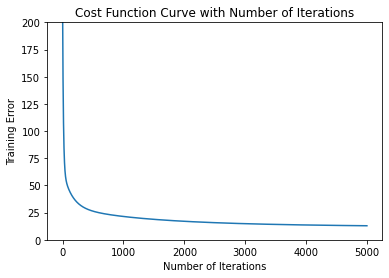

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print('Training Error: {0:.2f}'.format(train_error[-1]))
plt.plot(np.arange(len(train_error)),train_error)
plt.title('Cost Function Curve with Number of Iterations')
plt.xlabel("Number of Iterations")
plt.ylabel("Training Error")
plt.ylim(0, 200)

from google.colab import files
plt.savefig("ridge_loss.png", dpi=100)

plt.show()
files.download("ridge_loss.png")

We implemented the gradient descent and found cost equals 12.92 for $\lambda$=0.01, $\alpha$=0.01 and 5000 iterations. We would get different cost for different set of $\lambda$, $\alpha$ and number of iterations. The optimal value for number of iterations, $\lambda$ and $\alpha$ can be found through hyper parameter tuning. We can see the effect of ridge regression on coefficient values. We can see that on using Ridge regression, the coefficients of features are reduced.


<img src="https://i.postimg.cc/zGDJMb4F/ols-vs-ridge-coefficients.png">





### Choice of $\lambda$

Finding the optimal value of $\lambda$ is considered an art than a science. The different methods that can be applied to find the value of $\lambda$ hyperparameter is:
1. Use k-fold cross validation to select the $\lambda$ that gives the minimum error on cross validation dataset.
2. Manually run the model with different values of $\lambda$ and choose the value that gives the least error.

## Takeaways
1. Ridge Regression penalizes higher coefficients more due to the square of the coefficient values in penalty term.
2. $L_2$ norm is Circle shaped in 2D space and Sphere shaped in 3D space.
3. It performs coefficient shrinkage by reducing the coefficients of unknown features towards zero.
4. It is capable of performing grouping effect.